In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
from luwiji.svm import illustration, demo

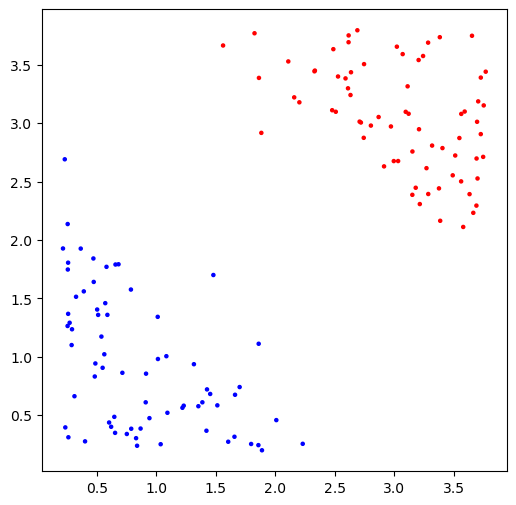

In [3]:
demo.problem(1)

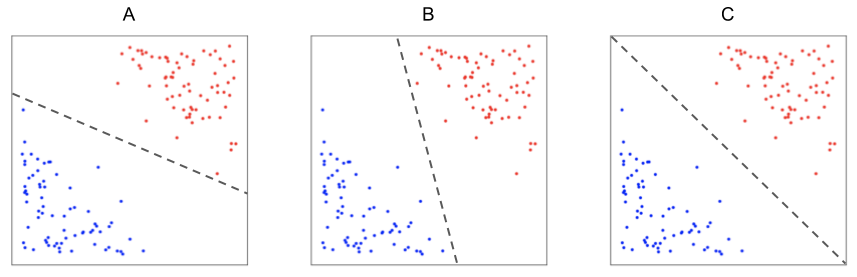

In [4]:
illustration.choose_one

In [5]:
demo.C(1)

interactive(children=(FloatLogSlider(value=10.0, description='C', max=1.0, min=-2.0, step=0.25), Output()), _d…

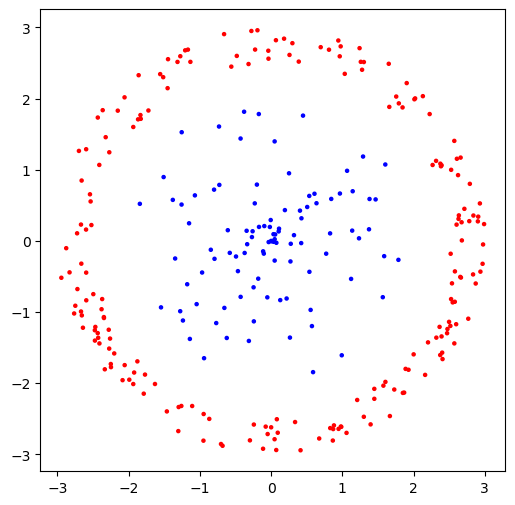

In [6]:
demo.problem(2)

In [7]:
demo.C(2)

interactive(children=(FloatLogSlider(value=10.0, description='C', max=1.0, min=-2.0, step=0.25), Output()), _d…

In [8]:
demo.rbf()

interactive(children=(IntSlider(value=90, description='elevation', max=90, step=15), FloatSlider(value=0.0, de…

In [9]:
demo.kernel(2)

interactive(children=(ToggleButtons(description='Kernel', options=('linear', 'rbf'), value='linear'), FloatLog…

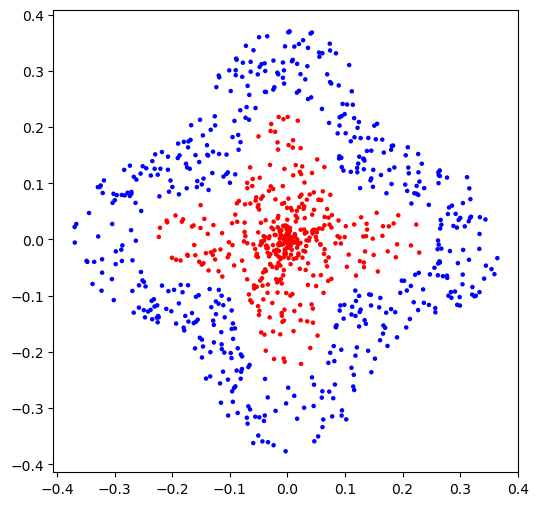

In [10]:
demo.problem(3)

In [11]:
demo.kernel(3)

interactive(children=(ToggleButtons(description='Kernel', options=('linear', 'rbf'), value='linear'), FloatLog…

In [12]:
demo.gamma()

interactive(children=(FloatLogSlider(value=31.622776601683793, description='gamma', max=1.5, min=-1.5, step=0.…

In [13]:
demo.svm()

interactive(children=(ToggleButtons(description='Problem', options=(1, 2, 3), value=1), Output()), _dom_classe…

## Suport vector regressor

In [14]:
df = pd.read_csv('carprice.csv', index_col='ID')
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
ID,,,,,,,,,,,,
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


In [15]:
df.isna().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage_kmpl           2
Engine_CC             36
Power_bhp            142
Seats                 42
Price                  0
dtype: int64

In [16]:
columns_drop = ['Name']

df.drop(columns=columns_drop, inplace=True)

In [17]:
X = df.drop(columns='Price')
y = df.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4762, 10), (1191, 10), (4762,), (1191,))

In [18]:
X_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats
ID,,,,,,,,,,
4380,Coimbatore,2016,60913,Petrol,Manual,First,20.73,1373.0,91.1,5.0
2676,Kochi,2017,40459,Diesel,Manual,First,19.67,1582.0,126.2,5.0
647,Jaipur,2004,200000,Petrol,Manual,First,0.00,1086.0,NaN,5.0
5966,Hyderabad,2018,1048,Petrol,Manual,First,18.90,998.0,67.1,5.0
2198,Ahmedabad,2013,96000,Diesel,Manual,Second,23.50,1498.0,90.0,5.0


In [19]:
from jcopml.tuning import grid_search_params as gsp

gsp.svm_params

{'algo__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [20]:
from jcopml.pipeline import num_pipe, cat_pipe
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['Year', 'Kilometers_Driven', 'Mileage_kmpl', 'Engine_CC', 'Power_bhp', 'Seats']),
    ('categoric', cat_pipe(encoder='onehot'), ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])

model = GridSearchCV(pipeline, gsp.svm_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits


/home/irkham/miniconda3/envs/jcopml/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/irkham/miniconda3/envs/jcopml/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/irkham/miniconda3/envs/jcopml/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/irkham/miniconda3/envs/jcopml/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/irkham/miniconda3/envs/jcopml/lib/pyth

{'algo__C': 10.0, 'algo__gamma': 0.001}
0.4191924234077009 0.08719422320538917 0.055845667362476537


## scalling 

In [21]:
from jcopml.pipeline import num_pipe, cat_pipe
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='robust'), ['Year', 'Kilometers_Driven', 'Mileage_kmpl', 'Engine_CC', 'Power_bhp', 'Seats']),
    ('categoric', cat_pipe(encoder='onehot'), ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])

model = GridSearchCV(pipeline, gsp.svm_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits


/home/irkham/miniconda3/envs/jcopml/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/irkham/miniconda3/envs/jcopml/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/irkham/miniconda3/envs/jcopml/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/irkham/miniconda3/envs/jcopml/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/irkham/miniconda3/envs/jcopml/lib/pyth

{'algo__C': 10.0, 'algo__gamma': 0.1}
0.8692907569381978 0.8365068850275925 0.8314246832596818


## polinomial features

In [25]:
from luwiji.svm import demo

In [26]:
demo.poly_features()

interactive(children=(ToggleButtons(description='degree', options=(1, 2, 3), value=1), Checkbox(value=False, d…

In [22]:
gsp.svm_poly_params

{'prep__numeric__poly__degree': [1, 2, 3],
 'prep__numeric__poly__interaction_only': [True, False],
 'algo__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [24]:
?num_pipe

Signature:
num_pipe(
    impute='median',
    poly=None,
    transform=None,
    scaling=None,
    memory=None,
    n_neighbors=5,
    weights='uniform',
)
Docstring:
A scikit-learn numerical pipeline used in ColumnTransformer


== Example usage ==
from jcopml.pipeline import num_pipe
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='minmax'), numerical_columns)
])


== Arguments ==
impute: {'knn', 'mean', 'median', None}
    type of imputation

scaling: {'standard', 'minmax', 'robust', 'maxabs', 'normalize', None}
    type of scaling

transform: {'yeo-johnson', 'box-cox', None}
    type of power transformer

poly: int or None
    if int is specified, it specifies the polynomial degree

memory: None or str
    Providing path string enables scikit-learn's pipeline caching.
    See scikit-learn pipeline documentation for more info


== Return ==
Scikit-learn pipeline object
File:      ~/miniconda3/envs/jcopml/lib/python3.9

In [27]:
from jcopml.pipeline import num_pipe, cat_pipe
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2, scaling='robust'), ['Year', 'Kilometers_Driven', 'Mileage_kmpl', 'Engine_CC', 'Power_bhp', 'Seats']),
    ('categoric', cat_pipe(encoder='onehot'), ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])

model = GridSearchCV(pipeline, gsp.svm_poly_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 294 candidates, totalling 882 fits


/home/irkham/miniconda3/envs/jcopml/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/irkham/miniconda3/envs/jcopml/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/irkham/miniconda3/envs/jcopml/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/irkham/miniconda3/envs/jcopml/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/irkham/miniconda3/envs/jcopml/lib/pyth

{'algo__C': 10.0, 'algo__gamma': 0.1, 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
0.8692907569381978 0.8365068850275925 0.8314246832596819


## lanjutkan untuk kasus klasifikasi creditcard